In [27]:
# import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [28]:
# import the data

zomato=pd.read_csv(r"c:\Users\nimma\Downloads\Zomato data .csv", encoding_errors='ignore')

zomato.head(10)

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet
5,Timepass Dinner,Yes,No,3.8/5,286,600,Buffet
6,Rosewood International Hotel - Bar & Restaurant,No,No,3.6/5,8,800,Buffet
7,Onesta,Yes,Yes,4.6/5,2556,600,Cafes
8,Penthouse Cafe,Yes,No,4.0/5,324,700,other
9,Smacznego,Yes,No,4.2/5,504,550,Cafes


In [29]:
# information about the data

zomato.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   name                         148 non-null    object
 1   online_order                 148 non-null    object
 2   book_table                   148 non-null    object
 3   rate                         148 non-null    object
 4   votes                        148 non-null    int64 
 5   approx_cost(for two people)  148 non-null    int64 
 6   listed_in(type)              148 non-null    object
dtypes: int64(2), object(5)
memory usage: 8.2+ KB


In [30]:
# find null values
zomato.isnull().sum()

name                           0
online_order                   0
book_table                     0
rate                           0
votes                          0
approx_cost(for two people)    0
listed_in(type)                0
dtype: int64

In [31]:
# change date type rate in object to int

zomato['rate']=zomato['rate'].astype(str)
zomato['rate']=zomato['rate'].str.replace('/5','',regex=False)
zomato['rate']=zomato['rate'].replace(['NEW','-','nan'],np.nan)
zomato['rate']=zomato['rate'].astype(float)

In [32]:
# change the column name
zomato.rename(columns={'listed_in(type)':'restaurant_type'},inplace=True)
zomato.rename(columns={'approx_cost(for two people)':'approx_cost_for_two_prople'},inplace=True)

zomato.head()

,name,online_order,book_table,rate,votes,approx_cost_for_two_prople,restaurant_type
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


In [33]:
zomato.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   name                        148 non-null    object 
 1   online_order                148 non-null    object 
 2   book_table                  148 non-null    object 
 3   rate                        148 non-null    float64
 4   votes                       148 non-null    int64  
 5   approx_cost_for_two_prople  148 non-null    int64  
 6   restaurant_type             148 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 8.2+ KB


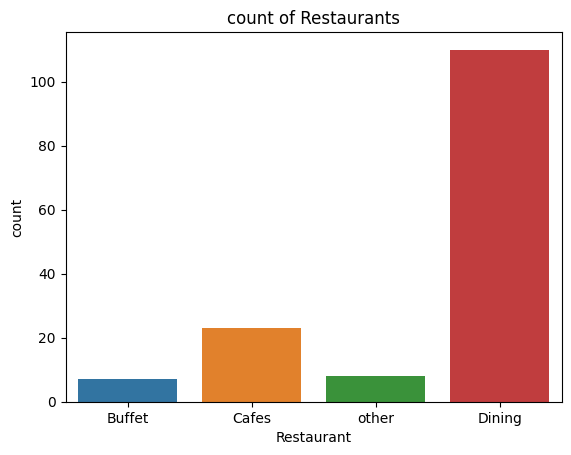

In [34]:
# 1. Use a count plot to show the distribution of restaurant types.
 
zomato.head(15)

a=sns.countplot(data=zomato,x='restaurant_type',hue='restaurant_type')
plt.title('count of Restaurants')
plt.xlabel('Restaurant')
plt.ylabel('count')
plt.show()


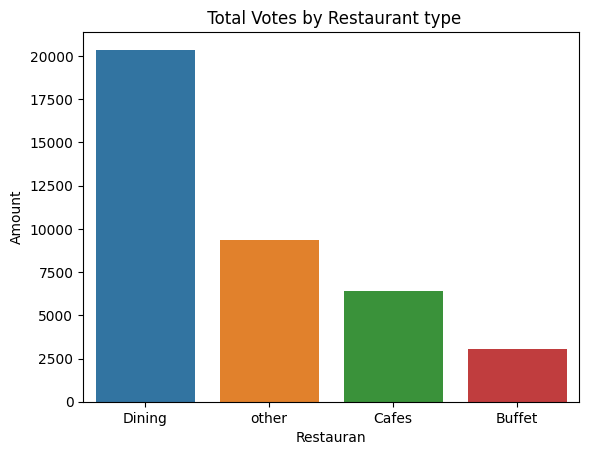

In [35]:
# Analysis 2: Votes by Restaurant Type 


votes=zomato.groupby(['restaurant_type'],as_index=False)['votes'].sum().sort_values(by='votes',ascending=False)

sns.barplot(data=votes,x='restaurant_type',y='votes',hue='restaurant_type')
plt.title(' Total Votes by Restaurant type')
plt.xlabel('Restauran')
plt.ylabel('Amount')
plt.show()

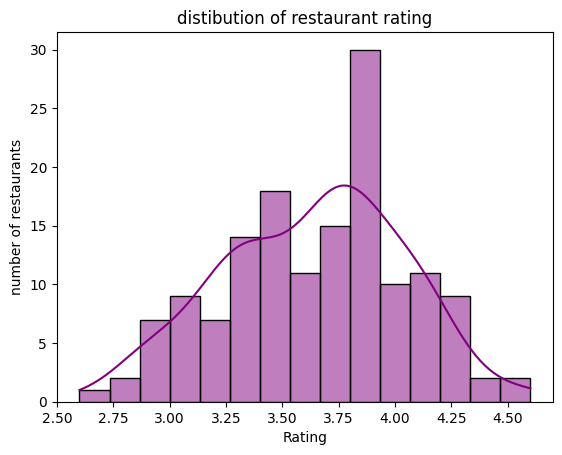

In [36]:
'''Analysis 3: Ratings Distribution 
1. Plot a histogram of the rate column to show the distribution of ratings.'''

sns.histplot(data=zomato,x='rate',bins=15 ,kde=True ,color='Purple')
plt.title('distibution of restaurant rating')
plt.xlabel('Rating')
plt.ylabel('number of restaurants')
plt.show()

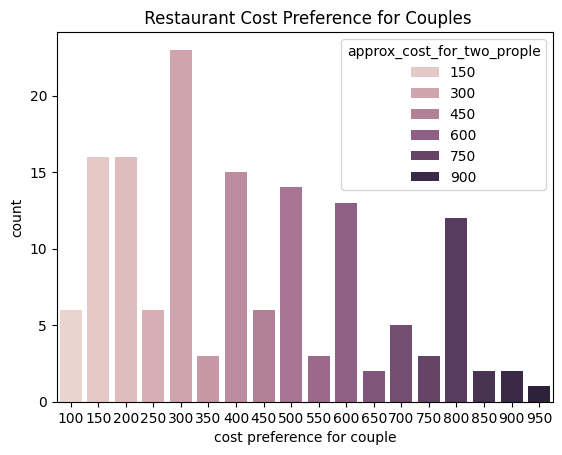

In [37]:
'''Analysis 4: Restaurant Cost Preference for Couples 
1. Use a count plot to examine approx_cost(for two people). '''

sns.countplot(data=zomato,x='approx_cost_for_two_prople',hue='approx_cost_for_two_prople')
plt.title(' Restaurant Cost Preference for Couples')
plt.xlabel('cost preference for couple')
plt.ylabel('count')
plt.show()

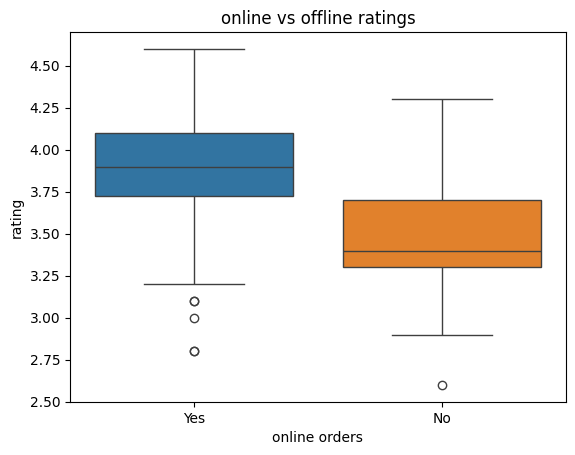

In [38]:
'''Analysis 5: Online vs. Offline Ratings 
1. Create a box plot to compare ratings for online vs. offline orders. 
2. Conclusion: Observe if online orders have higher ratings than offline ones.'''

sns.boxplot(data=zomato, x='online_order', y='rate' ,hue='online_order')
plt.title('online vs offline ratings')
plt.xlabel('online orders')
plt.ylabel('rating')
plt.show()

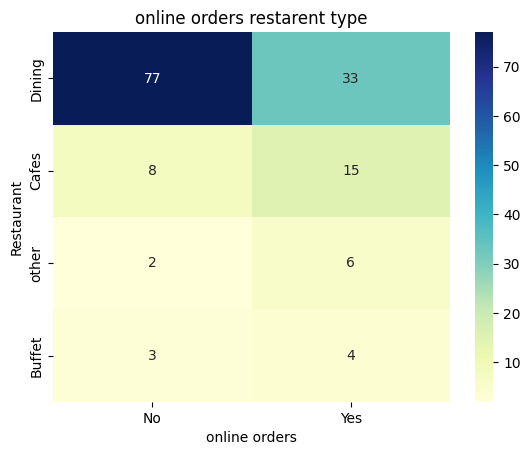

In [39]:
'''Analysis 6: Online Orders by Restaurant Type 
1. Create a pivot table to show the number of restaurants offering online vs. offline orders by type. 
2. Use a heatmap to visualize this data. '''

pivot_table=pd.pivot_table(zomato,index='restaurant_type',columns='online_order',values='name',aggfunc='count' ,fill_value=0)

pivot_table_sort=pivot_table.sort_values(by='Yes',ascending=False)

plt.Figure(figsize=(10,6))
sns.heatmap(pivot_table_sort,annot=True,fmt='d',cmap='YlGnBu')
plt.title('online orders restarent type')
plt.xlabel('online orders')
plt.ylabel('Restaurant')
plt.show()


In [40]:
# export csv file

zomato.to_csv('zomato.csv')

In [41]:
from sqlalchemy import create_engine

# step 1 connect to postgress

username="postgres"
password="Manasa"
host="localhost"
port="5432"
database="Zomato analysis"

#engine=create_engine(f"postgresql+psycopg2://{username}:{password}@{host}:{port}/{database}")
engine = create_engine(f"postgresql+psycopg2://{username}:{password}@{host}:{port}/{database}")

table_name="zomato_sales"


zomato.to_sql(table_name, engine, if_exists="replace", index=False)

print(f"data suceffully loaded into table '{table_name}' in database '{database}'")


data suceffully loaded into table 'zomato_sales' in database 'Zomato analysis'
